In [1]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from libs.InteractivePitchUI import InteractivePitch, PitchDisplay

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


/home/martin/.local/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (None)/charset_normalizer (2.1.0) doesn't match a supported version!
  warnings.warn(


In [3]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data", "Denmark")
print(data.head())
one_match = extract_one_match(data, 1)


   Time [s]_team half_team  minute_team  Period_team   home_6_x  home_6_y  \
0           0.00        1H            0            1  18.863983  6.937420   
1           0.04        1H            0            1  18.860191  6.943985   
2           0.08        1H            0            1  18.856722  6.951682   
3           0.12        1H            0            1  18.853645  6.960831   
4           0.16        1H            0            1  18.851160  6.971420   

   home_18_x  home_18_y   home_1_x  home_1_y  ...  away_16_x  away_16_y  \
0  16.191383  27.790174  52.532173 -0.016596  ...        NaN        NaN   
1  16.196404  27.782358  52.532738 -0.013765  ...        NaN        NaN   
2  16.200035  27.776085  52.534679 -0.010368  ...        NaN        NaN   
3  16.201321  27.769873  52.537842 -0.006824  ...        NaN        NaN   
4  16.199764  27.763958  52.543060 -0.003730  ...        NaN        NaN   

   away_25_x  away_25_y  home_26_x  home_26_y  away_3_x  away_3_y  away_15_x  \
0     

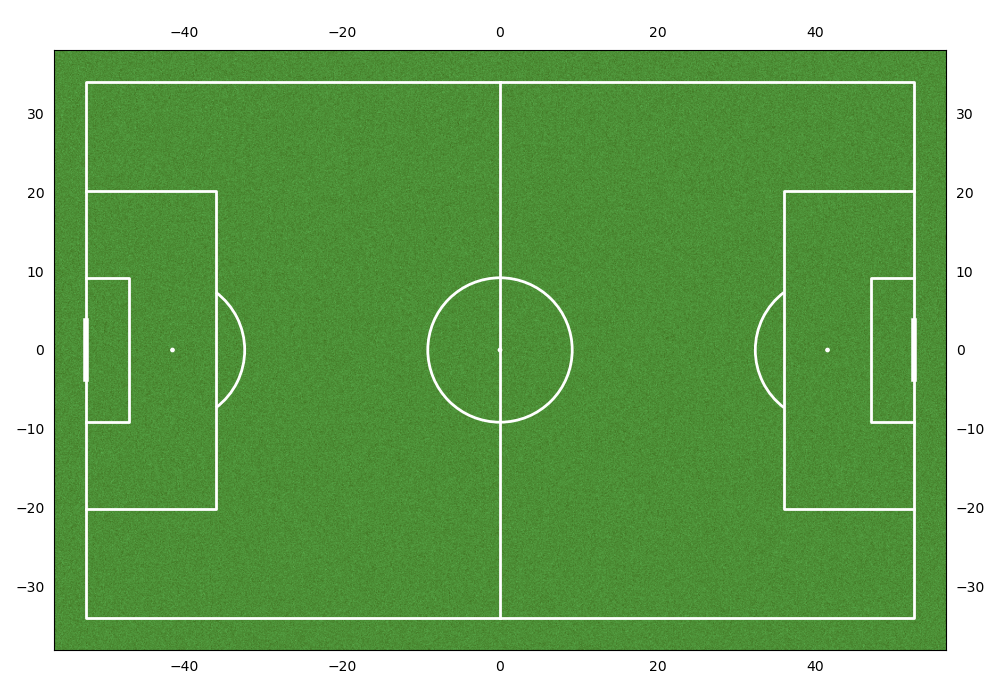

Ball placement mode enabled. Click to place the ball on the pitch.
Ball placed at: (7.388597257633876, 15.921495556657284)
Situation saved! Total saved situations: 1
Cleared the current situation. All players are available for selection again.
Loaded Situation 1
{'home_1_x': 41.34402814293085, 'home_1_y': 0.3374731727336737, 'home_2_x': 23.479417117457444, 'home_2_y': 20.48267283975688, 'home_3_x': 24.619711438232343, 'home_3_y': 3.7583561350583707, 'home_4_x': 20.43863226205771, 'home_4_y': -14.739751735289982, 'home_5_x': 2.5740212365843007, 'home_5_y': 28.21133434723118, 'home_6_x': 7.261897888658893, 'home_6_y': 16.681691770507214, 'home_7_x': 8.275492840458796, 'home_7_y': 8.9530302630329, 'home_8_x': -3.12745036729018, 'home_8_y': 12.880710701257556, 'home_9_x': -2.2405547844652602, 'home_9_y': 1.7311662314585448, 'home_10_x': -7.561928281414787, 'home_10_y': 3.885055504033353, 'home_11_x': 3.8410149263341964, 'home_11_y': -8.15138454859057, 'ball_x_team': 7.388597257633876, 'bal

In [4]:
%matplotlib widget

interactive_pitch = InteractivePitch(one_match)


In [6]:
index_displayer = PitchDisplay(one_match,interactive_pitch.similar_situation_indices)

In [7]:
from libs.similar_movement import *
distance_index_list = find_similar_movement(one_match, index_displayer.get_selected_index(), interactive_pitch.similar_situation_indices )

105
79976
9788
75737
65017
140845
32466
32514
32562
108980
32610
32658
10157
32297
95253
47101
104909
17300
32706
104957
95301
38179
32754
11725
1065
8211
124884
32883
55000
32931
104268
28507
32979
44753
38000
23467
97227
53616
134442
90056
86917
49855
4834
49374
88466
62116
88164
49631
49583
53150
85202
139577


In [9]:
distance_index_list = sorted(distance_index_list, key = lambda x : x[0])

[(442.5148446872912, 105), (0.0, 79976), (280.52431599680176, 9788), (172.52791221211152, 75737), (231.79652009676477, 65017), (237.890500549963, 140845), (152.70230441584403, 32466), (164.54506219521002, 32514), (178.11656588567686, 32562), (253.13566777157735, 108980), (180.81877975952548, 32610), (190.3687309808467, 32658), (280.08049119725547, 10157), (234.66596447047309, 32297), (82.45274804135863, 95253), (188.4129394979253, 47101), (182.35977739248779, 104909), (326.8486169413758, 17300), (228.89872200341352, 32706), (268.23110636483085, 104957), (146.3385884906323, 95301), (147.6534046845093, 38179), (249.08734619296973, 32754), (299.9414412384962, 11725), (252.94568459045746, 1065), (252.42129542366519, 8211), (266.7275176748993, 124884), (71.58075134093956, 32883), (504.634869679331, 55000), (64.15718593323327, 32931), (291.51825043798635, 104268), (203.5607403024521, 28507), (86.63862722444064, 32979), (266.58615654994236, 44753), (272.8404041088307, 38000), (332.46979365576

In [8]:
index_displayer_2 = PitchDisplay(one_match, [index for (_,index) in distance_index_list])